<a href="https://colab.research.google.com/github/maxfraid/compmathsystem/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%965_%D0%91%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B0_Pandas_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №5. Библиотека Pandas. Визуальный анализ данных

## Комплексное задание №1. Применение основных методов для анализа данных

1. Скачайте этот блокнот к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература
- [**Блокнот с теорией**](https://colab.research.google.com/drive/1SLqmaYz4xEsxVV-LGwb3ityheBTzHJQu?usp=sharing)
- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с Вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [ ]:
%matplotlib inline
import pandas as pd
pd.__version__

'1.5.3'

Если вы увидели warning, не переживайте, всё хорошо.
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [ ]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values=' ?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [ ]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


2) Сколько колонок и сколько строк в этом датасете?

In [ ]:
rows, columns = df.shape
print(f"{rows} строк, {columns} столбцов.")

32561 строк, 15 столбцов.


3) Какие типы данных у элементов этого датасета?

In [ ]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

4) Какие признаки имеют пропуски?

In [ ]:
df.isnull().any()

age               False
workclass          True
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation         True
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country     True
income            False
dtype: bool

5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

**Ваш ответ:** Пропуски значений **workclass (рабочего класса)** скорее всего связаны с ошибками либо с отсутствием нужного варианта.

**occupation (сфера, область работы)** могла быть не указана людьми, имеющими серую или незаконную работу либо не имеющими работу в целом. Также остаётся вариант с отсутствием нужного варианта.

**native.country (родная страна)** могла быть не указана в следствии предубеждений и предвзятости окружающих лиц по отношению к национальным меньшинствам.

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [ ]:
print(df['workclass'].nunique())
df['workclass'].unique()

8


array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

7) Какой средний возраст женщин и мужчин?

In [ ]:
df['sex'] = df['sex'].str.strip()
woman_mean_age = df[df['sex'] == 'Female']['age'].mean()
man_mean_age = df[df['sex'] == 'Male']['age'].mean()

print(f'Средний возраст женщин: {woman_mean_age}')
print(f'Средний возраст мужчин: {man_mean_age}')

Средний возраст женщин: 36.85823043357163
Средний возраст мужчин: 39.43354749885268


8) Постройте гистограмму(bar) распределения образования людей (education)

<Axes: xlabel='Образование', ylabel='Кол-во людей'>

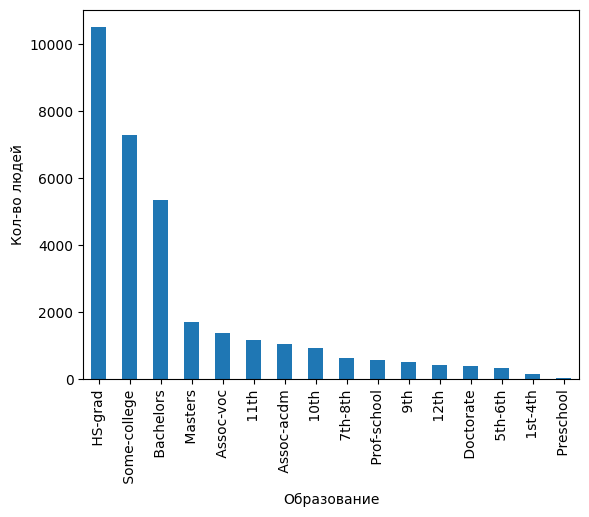

In [ ]:
df['education'].value_counts().plot(xlabel='Образование', ylabel='Кол-во людей', kind='bar')

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак income) и тех, кто получает менее 50K в год?

In [ ]:
df['income'] = df['income'].str.strip()
mean_age_high_income = df[df['income'] == '>50K']['age'].mean()
std_age_high_income = df[df['income'] == '>50K']['age'].std()

print(f"""Средний возраст: {mean_age_high_income}
Среднеквадратичные отклонения возраста: {std_age_high_income}""")

Средний возраст: 44.24984058155847
Среднеквадратичные отклонения возраста: 10.519027719851826


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

Нет, но тенденция есть.


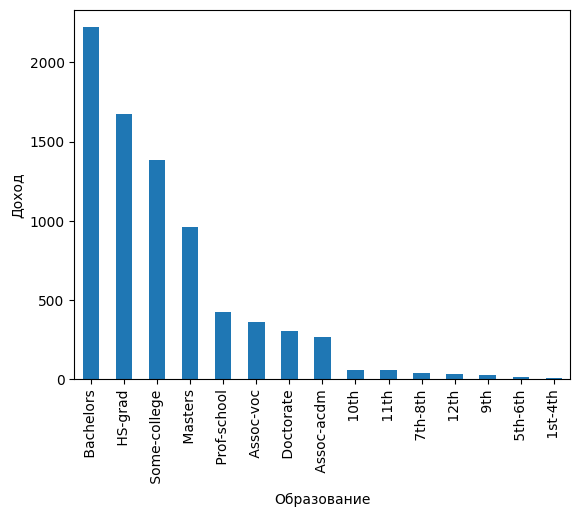

In [ ]:
df[df['income'] == '>50K']['education'].value_counts().plot(
    xlabel="Образование",
    ylabel="Доход",
    kind='bar'
)

print("Нет, но тенденция есть.")

11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

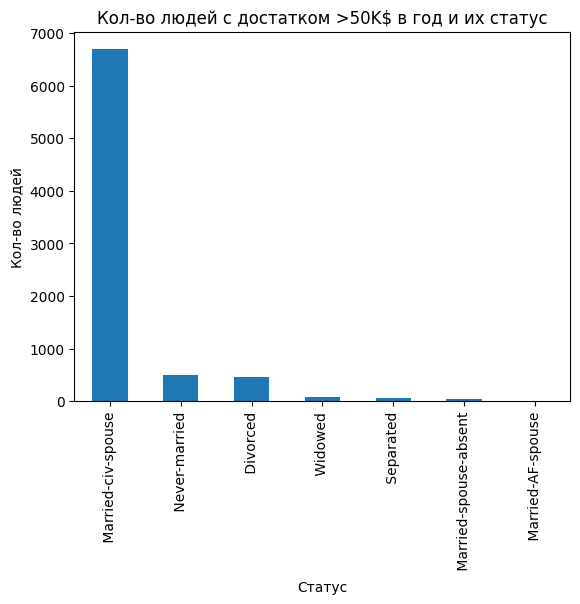

In [ ]:
df[df['income'] == '>50K']['marital.status'].value_counts().plot(
    xlabel="Статус",
    ylabel="Кол-во людей",
    title="Кол-во людей с достатком >50K$ в год и их статус",
    kind='bar'
    )
print()

12) Постройте [сводную таблицу](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) для отображения зависимостей среднего времени работы (hours.per.week) с доходом (income) для каждой страны (native.country).  


> Пример фрагмента таблицы:



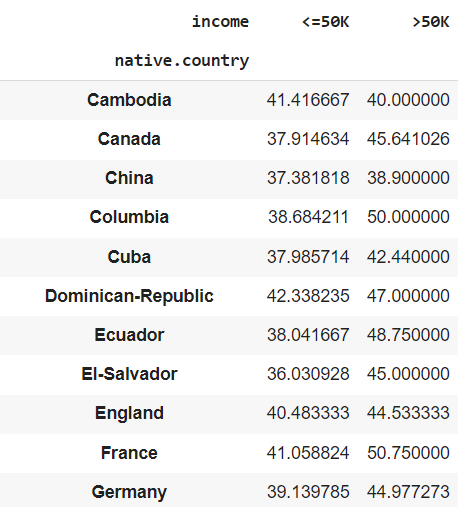

In [ ]:
df.pivot_table(index='native.country', columns='income', values="hours.per.week")

income,<=50K,>50K
native.country,,
Cambodia,41.416667,40.000000
Canada,37.914634,45.641026
China,37.381818,38.900000
Columbia,38.684211,50.000000
Cuba,37.985714,42.440000
Dominican-Republic,42.338235,47.000000
Ecuador,38.041667,48.750000
El-Salvador,36.030928,45.000000
England,40.483333,44.533333


13) Постройте сводную таблицу для сравнения уровня образования и разности между capital.gain и capital.loss по следующему алгоритму:&nbsp;  
1. Создайте вспомогательную таблицу (датафрейм) и добавьте в неё столбец "education" из целевой таблицы
2. Добавьте во вспомогательную таблицу ещё один столбец "capital.diff", значиниями которого будут являться разности столбцов capital.gain и capital.loss целевой таблицы
3. Удалите во вспомогательной таблице все строки, в которых значение столбца "capital.diff" равно нулю  
&nbsp; Подсказка:
```
summary_table = summary_table[summary_table['capital.diff'] != 0 ]
```
4. Для набора значений из столбца "capital.diff", необходимо сформировать 10 категорий (кластеров), это можно сделать с помощью математических функций, типа log, извлечение корня N-ой степени и округления, для последующего перехода к категориальным признакам.  
  * В нашем случае, можно воспользоваться методом [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) и равномерно разделить наш набор данных на целевое количество категорий
5. Добавьте во вспомогательную таблицу столбец "categories", и проинициализируйте его значениями категорий, которые возвращает метод pd.qcut()  
&nbsp; Пример:
```
summary_table['categories'] = pd.qcut(summary_table["capital.diff"], q = 10)

6. Постройте сводную таблицу с помощью метода pivot_table(),

Примерная структура таблицы (в качестве значений выводится количество людей, относящихся к той или иной группе):

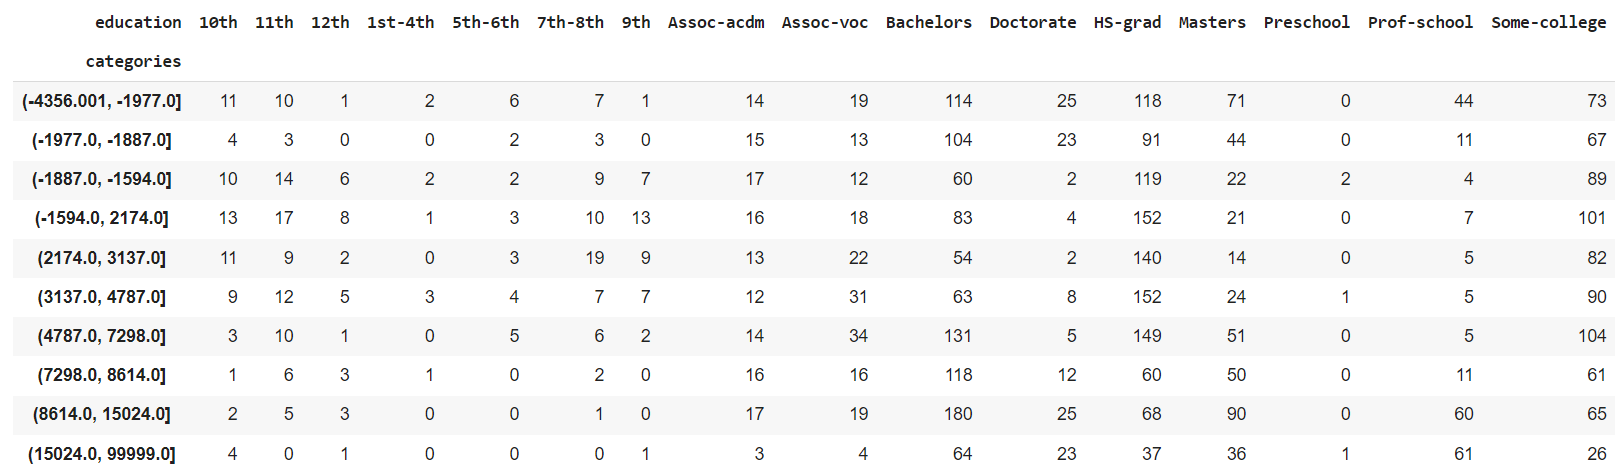

In [ ]:
gain_loss_comp = pd.DataFrame()
gain_loss_comp['education'] = df['education']
gain_loss_comp['capital.diff'] = df['capital.gain'] - df['capital.loss']
gain_loss_comp = gain_loss_comp[gain_loss_comp['capital.diff'] != 0 ]
gain_loss_comp['categories'] = pd.qcut(gain_loss_comp["capital.diff"], q = 10)
gain_loss_comp.pivot_table(values="capital.diff", columns="education", index="categories", aggfunc='count')

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
categories,,,,,,,,,,,,,,,,
"(-4356.001, -1977.0]",11,10,1,2,6,7,1,14,19,114,25,118,71,0,44,73
"(-1977.0, -1887.0]",4,3,0,0,2,3,0,15,13,104,23,91,44,0,11,67
"(-1887.0, -1594.0]",10,14,6,2,2,9,7,17,12,60,2,119,22,2,4,89
"(-1594.0, 2174.0]",13,17,8,1,3,10,13,16,18,83,4,152,21,0,7,101
"(2174.0, 3137.0]",11,9,2,0,3,19,9,13,22,54,2,140,14,0,5,82
"(3137.0, 4787.0]",9,12,5,3,4,7,7,12,31,63,8,152,24,1,5,90
"(4787.0, 7298.0]",3,10,1,0,5,6,2,14,34,131,5,149,51,0,5,104
"(7298.0, 8614.0]",1,6,3,1,0,2,0,16,16,118,12,60,50,0,11,61
"(8614.0, 15024.0]",2,5,3,0,0,1,0,17,19,180,25,68,90,0,60,65


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

<ipython-input-56-49945badd6d7>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['income'] == '>50K'][df['sex'] == 'Female']['native.country'].value_counts().plot(


<Axes: title={'center': 'Кол-во женщин с зарплатой более 50К и их родная страна'}, xlabel='Родная страна', ylabel='Кол-во женщин'>

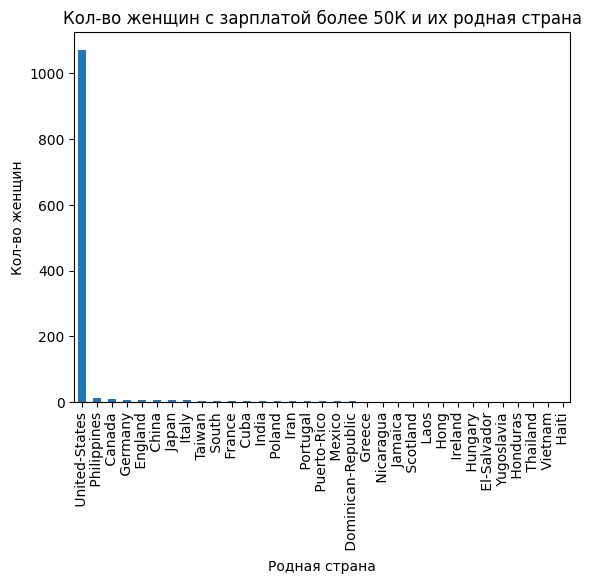

In [ ]:
# df['income'] = df['income'].str.strip()
# df['sex'] = df['sex'].str.strip()

df[df['income'] == '>50K'][df['sex'] == 'Female']['native.country'].value_counts().plot(
    title='Кол-во женщин с зарплатой более 50К и их родная страна',
    xlabel='Родная страна',
    ylabel='Кол-во женщин',
    kind='bar'
)

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

<Axes: title={'center': 'Зависимость заработка в час от уровня образования'}, xlabel='Долларов в час', ylabel='Уровень образования'>

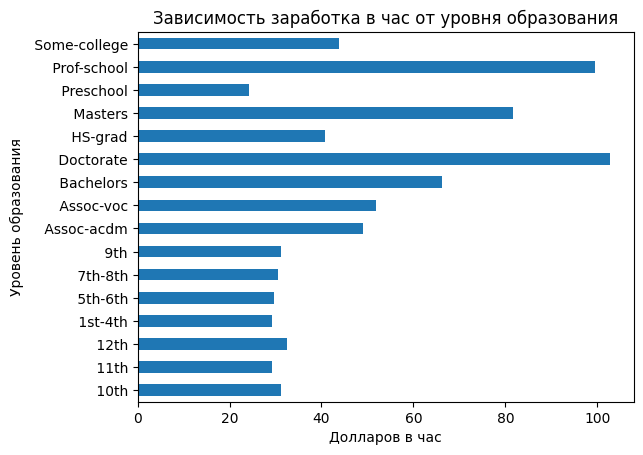

In [ ]:
import random

def magic_calculate(income: str) -> int:
    if income == '<=50K':
        return random.randint(0, 50)
    if income == '>50K':
        return random.randint(51, 200)

df['magic_salary'] = df['income'].apply(magic_calculate)

salary_education = df.groupby('education')['magic_salary'].mean()
salary_education.plot(
    title='Зависимость заработка в час от уровня образования',
    xlabel='Долларов в час',
    ylabel='Уровень образования',
    kind='barh'
)

## Комплексное задание №2. Визуальный анализ данных. Часть 1

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

В этом задании Вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите самостоятельно(!), с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [ ]:
url = 'https://raw.githubusercontent.com/romovpa/ml-course-hse/master/bikes_rent.csv'
df = pd.read_csv(url)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

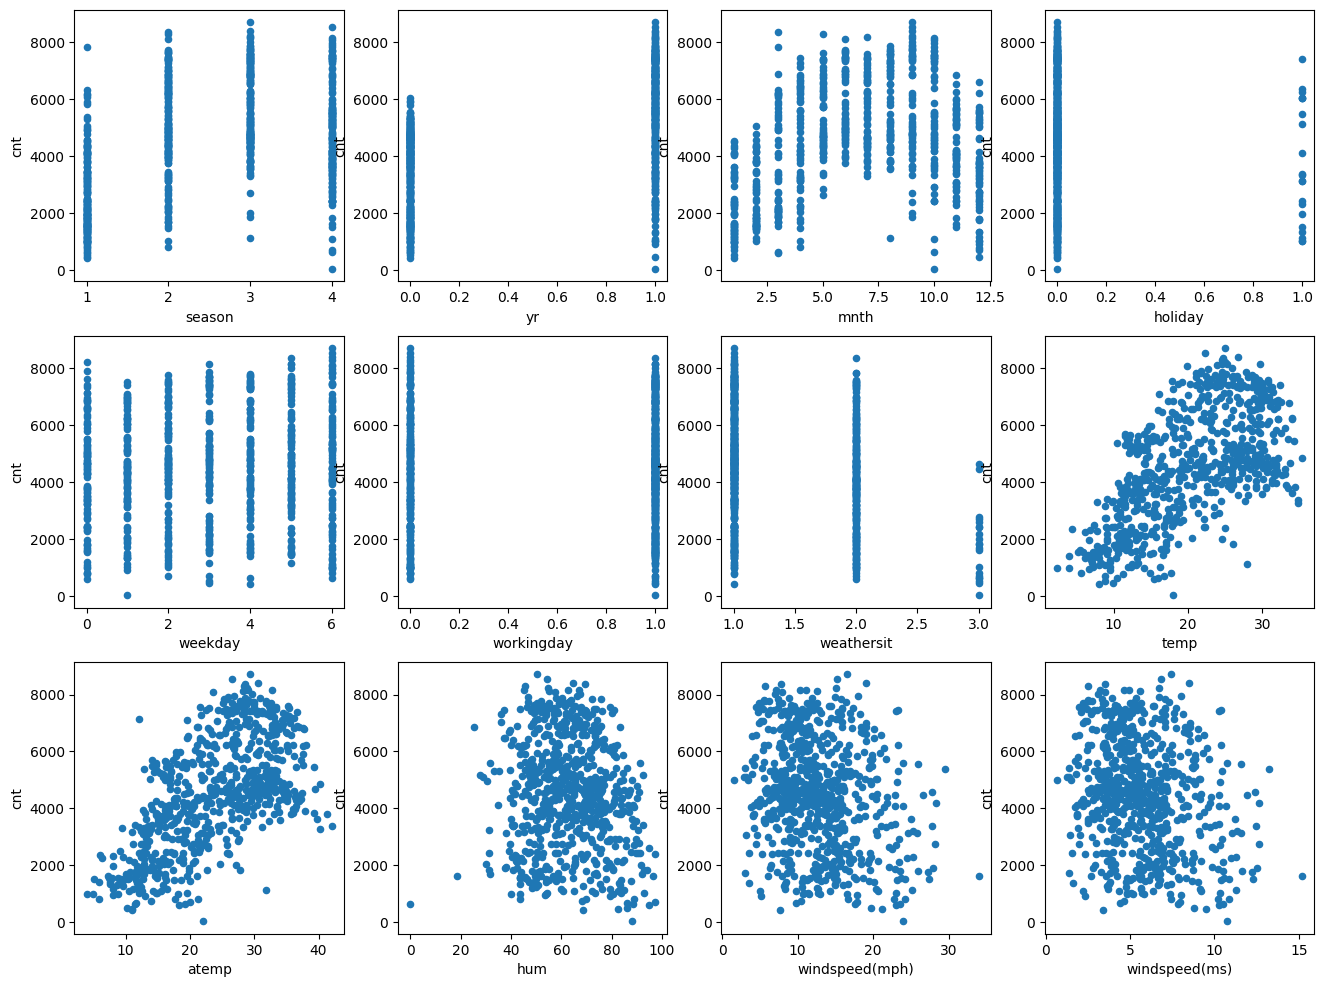

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

### 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?





ответ: Больше всего прокатов с 5 по 8 месяцы (с мая по август), то есть летом.

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.



Ответ: От температуры (temp и atemp)

### 2. Корреляционная матрица

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.



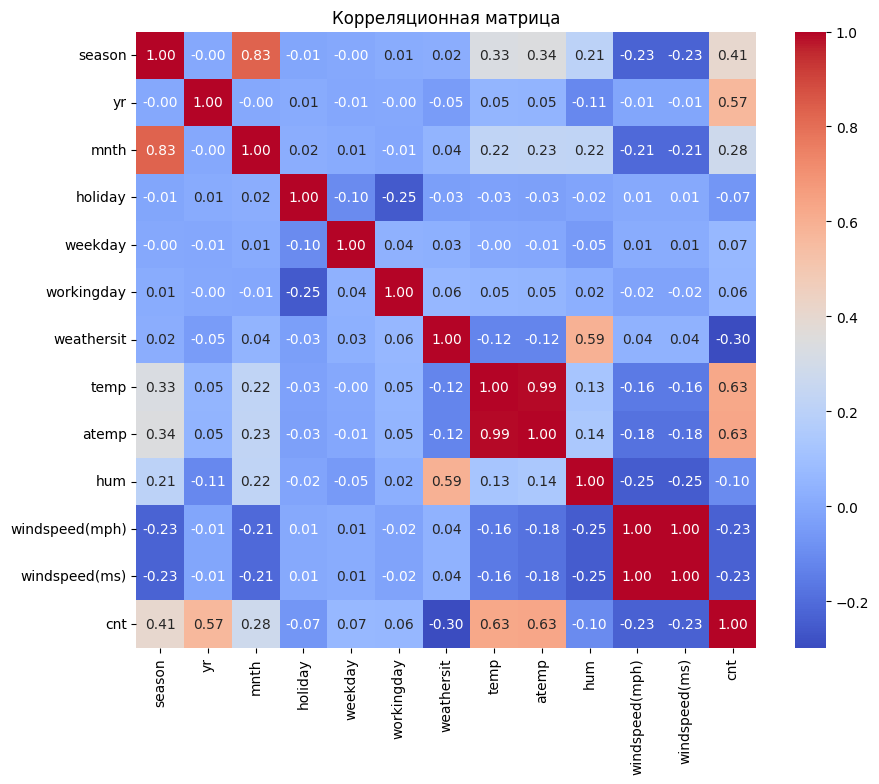

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ:

#### Меньше всего:
- Прогноз погоды
- Уровень ветра (mph)
- Уровень ветра (ms)
- Праздничный ли день или нет

#### Больше всего:
- Температура по ощущениям
- Температура
- Год

### 3. Barpot

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)



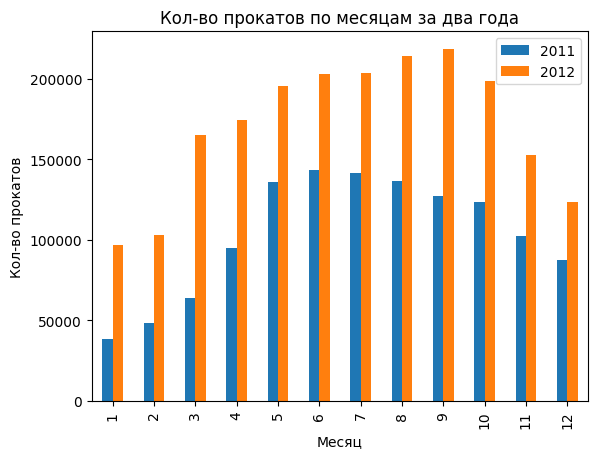

In [ ]:
first_year = df[df['yr'] == 0].groupby('mnth')['cnt'].sum()
second_year = df[df['yr'] == 1].groupby('mnth')['cnt'].sum()

series_list = [first_year, second_year]
result = pd.concat(series_list, axis=1)

result.plot(
    title='Кол-во прокатов по месяцам за два года',
    xlabel='Месяц',
    ylabel='Кол-во прокатов',
    kind='bar'
)

plt.legend(['2011', '2012'])
plt.show()

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: Велопрокат стал популярнее

### 4. Countplot

Постройте countplot диаграммы для признаков `weekday`, `weathersit`,



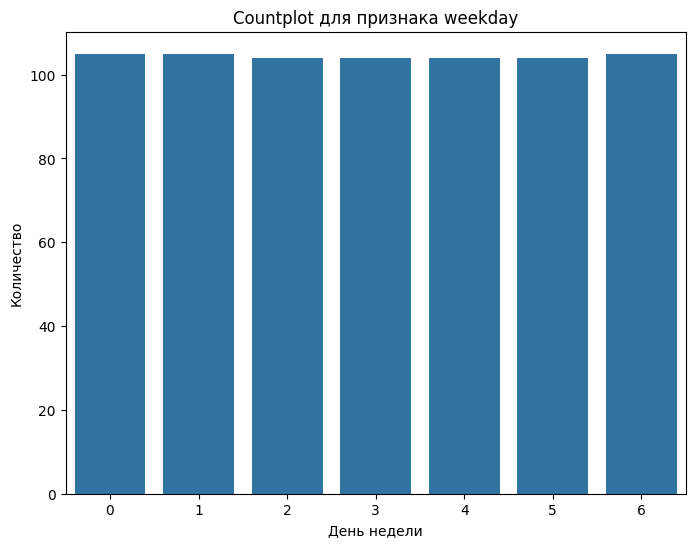

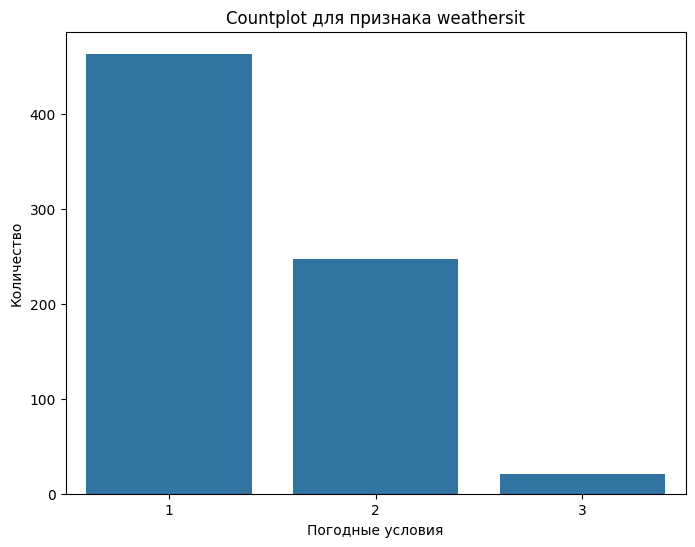

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='weekday', data=df)
plt.title('Countplot для признака weekday')
plt.xlabel('День недели')
plt.ylabel('Количество')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='weathersit', data=df)
plt.title('Countplot для признака weathersit')
plt.xlabel('Погодные условия')
plt.ylabel('Количество')
plt.show()

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.



Ответ: Данные из этого датасета были собраны из разных источников, учитывались как строгие данные по типу кол-ва арендных сдач, так и прогнозирование погодных условий. Учитывая, что оценка благоприятности погоды в целом не содержит значений 4 (туман, сильный дождь), а значений 3 очень мало, можно сказать о том, что в месте сбора данных благоприятный, мягкий климат, что в свою очередь могло завысить арендные показатели.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?


    
Ответ: Дни недели распределены неравномерно. Связано это может быть с большим кол-вом определённых дней недели в году.

### 5. Распределение

Постройте распределение целевого признака.


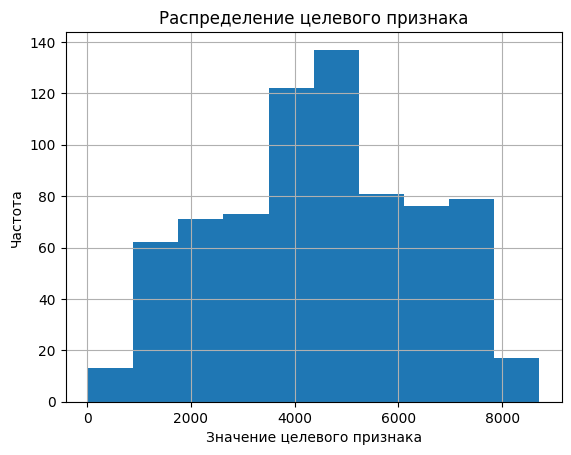

In [ ]:
df['cnt'].hist(bins=10)
plt.title('Распределение целевого признака')
plt.xlabel('Значение целевого признака')
plt.ylabel('Частота')
plt.show()


**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

Ответ: ~4300

### 6. Совместное распределение признаков

Постройте график совместного распределения признаков температура и ощущение температуры.



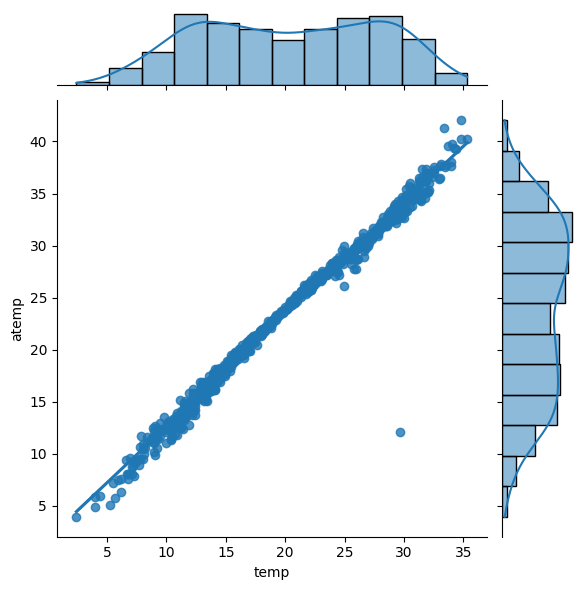

In [ ]:
sns.jointplot(x='temp', y='atemp', data=df, kind='reg')

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ:
1. Есть выбросы, они редкие, но есть. Быть может это ошибка, быть может погода была действительно обманчива.
2. Ощущаемая темература выше чем она есть на самом деле. Это может быть связано с началом лета, когда в период адаптации людям температура на улице кажется выше, однако той же связи с низкой температурой не установлено.


### 7. Боксплот (ящик с усами)

Постройте график распределения (боксплот) количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.




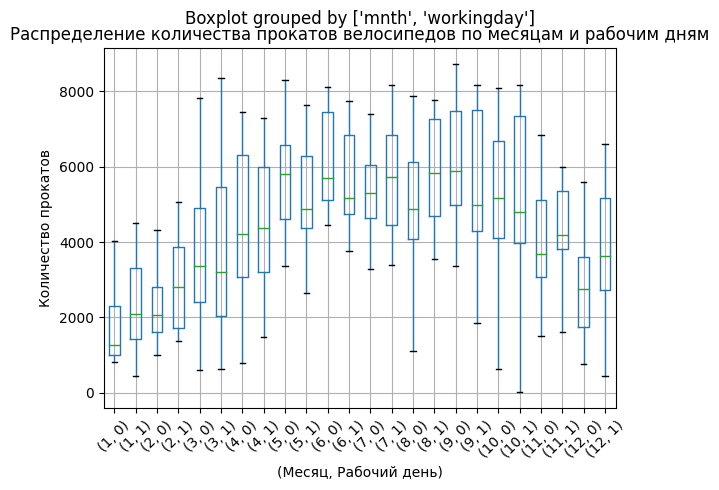

In [ ]:
df.boxplot(column='cnt', by=['mnth', 'workingday'], showfliers=False)
plt.title('Распределение количества прокатов велосипедов по месяцам и рабочим дням')
plt.xlabel('(Месяц, Рабочий день)')
plt.ylabel('Количество прокатов')
plt.xticks(rotation=45)
plt.show()

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.

Ответ: В основном отношение между арендой в будние и выходные дни заключается в сезонности. Осенью и зимой велосипеды чаще берут в будние дни, весной и ранним летом же чаще берут на выходных.

Летом на велосипеды берут в аренду как для времяпрепровождения и велопрогулок, так и как удобный вид транспорта, погода позволяет. В другие времена года же велосипеды используются только как транспорт при необходимости из-за погоды, велопрогулки на выходных заменяются времяпрепровождением в помещениях.


## Комплексное задание №3. Визуальный анализ данных. Часть 2

In [9]:
!pip install seaborn==0.11.0
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from google.colab import drive

drive.flush_and_unmount()

# colab = True # если работаете на своём компьютере, в локальной среде, поставьте False
# if colab:
#     from google.colab import drive
#     drive.mount('/content/drive')

В этом задании Вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams.

Исходные данные загрузите самостоятельно!

In [10]:
# if colab:
#     df = pd.read_csv('/content/drive/My Drive/Data/StudentsPerformance.csv')
# else:
#     df = pd.read_csv("../../data/StudentsPerformance.csv")

df = pd.read_csv('https://raw.githubusercontent.com/NadavKiani/Students-Performance-in-Exams/master/StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Ход задания:

#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


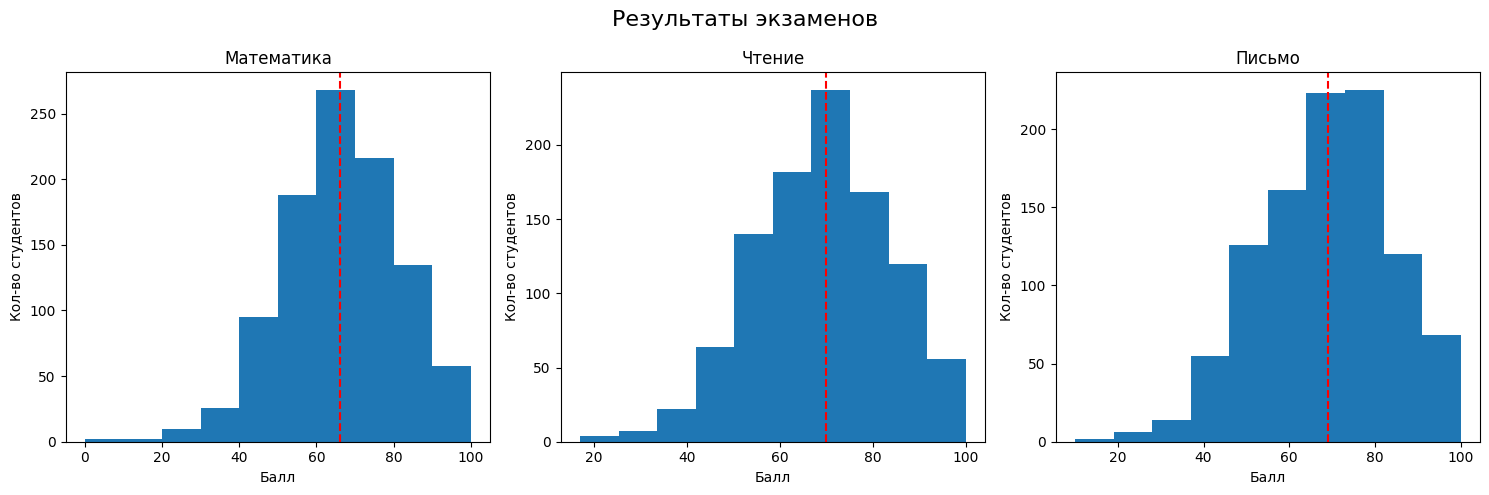

Медиана по математике: 66.0
Медиана по чтению: 70.0
Медиана по письму: 69.0


In [ ]:
math_median = df['math score'].median()
reading_median = df['reading score'].median()
writing_median = df['writing score'].median()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

df['math score'].plot(kind='hist', ax=axes[0], title='Математика')
axes[0].axvline(x=math_median, color='r', linestyle='--')
axes[0].set_xlabel('Балл')
axes[0].set_ylabel('Кол-во студентов')

df['reading score'].plot(kind='hist', ax=axes[1], title='Чтение')
axes[1].axvline(x=reading_median, color='r', linestyle='--')
axes[1].set_xlabel('Балл')
axes[1].set_ylabel('Кол-во студентов')

df['writing score'].plot(kind='hist', ax=axes[2], title='Письмо')
axes[2].axvline(x=writing_median, color='r', linestyle='--')
axes[2].set_xlabel('Балл')
axes[2].set_ylabel('Кол-во студентов')

plt.suptitle('Результаты экзаменов', fontsize=16)
plt.tight_layout()
plt.show()

print("Медиана по математике:", math_median)
print("Медиана по чтению:", reading_median)
print("Медиана по письму:", writing_median)

#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню?

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


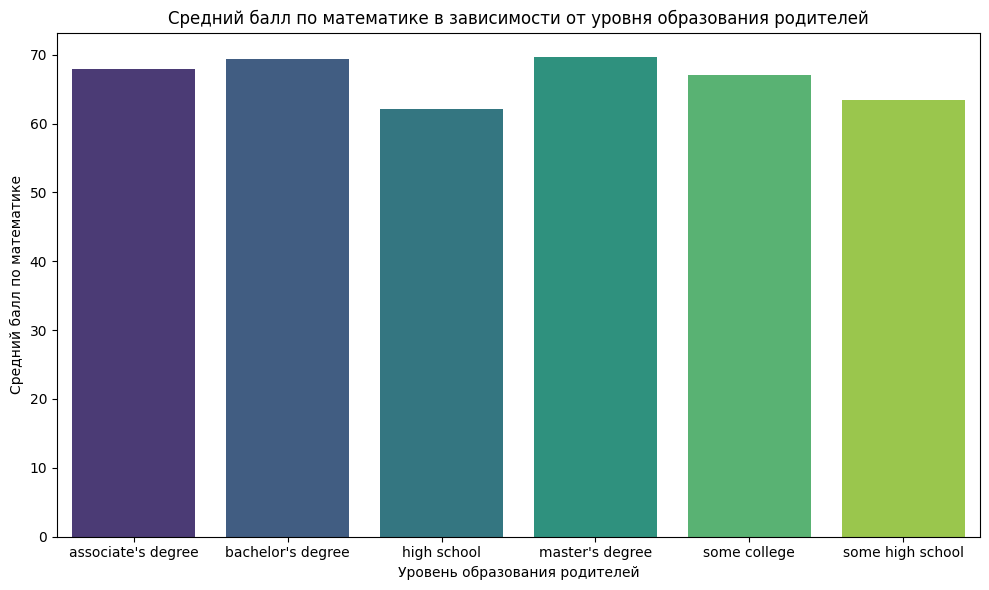

In [ ]:
mean_math_scores = df.groupby('parental level of education')['math score'].mean()

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_math_scores.index, y=mean_math_scores.values, palette='viridis')
plt.title('Средний балл по математике в зависимости от уровня образования родителей')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Средний балл по математике')
plt.xticks()
plt.tight_layout()
plt.show()

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [ ]:
count_female_top_scores = df[(df['gender'] == 'female') &
                             (df['math score'] > 90) &
                             (df['reading score'] > 90) &
                             (df['writing score'] > 90)]['gender'].count()

print("Количество студенток с баллами выше 90 по математике, чтению и письму:", count_female_top_scores)


Количество студенток с баллами выше 90 по математике, чтению и письму: 17


#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение


In [ ]:
gender_scores_stats = df.groupby('gender').agg({'math score': ['min', 'max', 'median'],
                                                'reading score': ['min', 'max', 'median'],
                                                'writing score': ['min', 'max', 'median']})

gender_scores_stats

math score             reading score             writing score       \
              min  max median           min  max median           min  max   
gender                                                                       
female          0  100   65.0            17  100   73.0            10  100   
male           27  100   69.0            23  100   66.0            15  100   

               
       median  
gender         
female   74.0  
male     64.0

#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола
###### (подсказка: используете  [pd.agg()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html))

1. Те, кто готовятся - лучше сдают.
2. Стандартный обед - лучше сдают.
3. У женщин зависимость более ярко выражена.


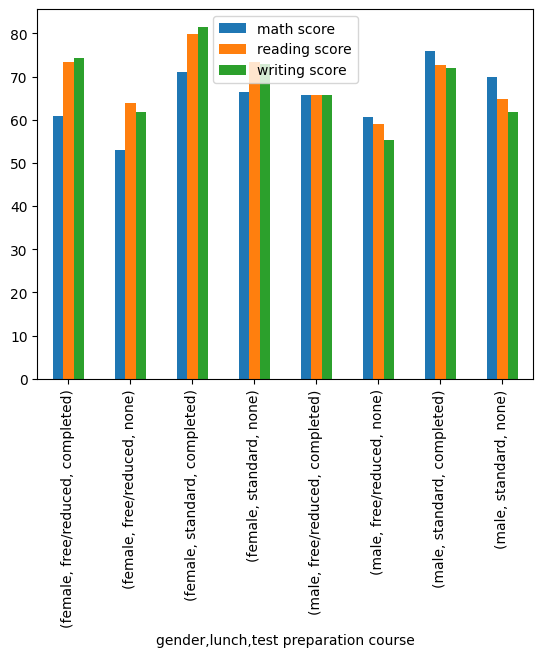

In [ ]:
meal_prep_stats = df.groupby(['gender', 'lunch', 'test preparation course']).agg(
        {'math score': 'mean', 'reading score': 'mean', 'writing score': 'mean'}
)

meal_prep_stats.plot(kind='bar')

print("1. Те, кто готовятся - лучше сдают.")
print("2. Стандартный обед - лучше сдают.")
print("3. У женщин зависимость более ярко выражена.")

#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы

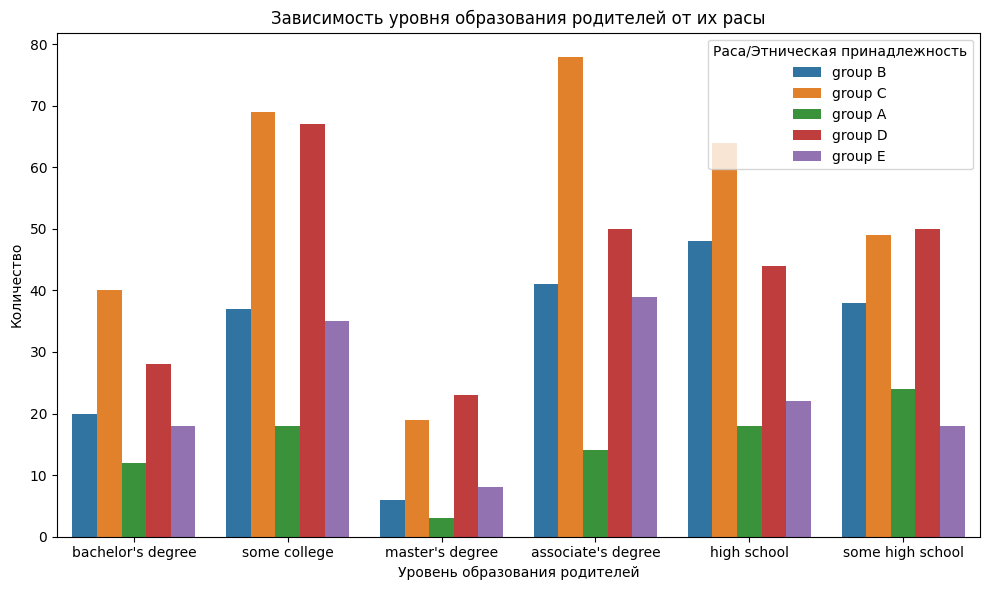

In [19]:
plt.figure(figsize=(10, 6))

sns.countplot(x='parental level of education', hue='race/ethnicity', data=df)

plt.title('Зависимость уровня образования родителей от их расы')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Количество')
plt.legend(title='Раса/Этническая принадлежность')
plt.tight_layout()

plt.show()

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

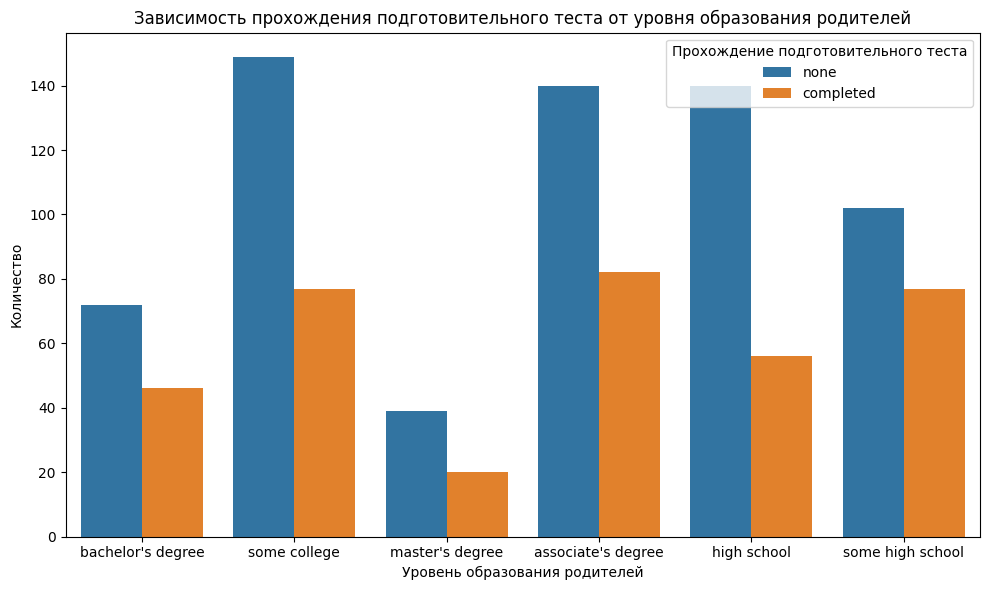

Дети, родители которых закончили только старшую школу ходят на курсы чаще.


In [21]:
plt.figure(figsize=(10, 6))

sns.countplot(x='parental level of education', hue='test preparation course', data=df)

plt.title('Зависимость прохождения подготовительного теста от уровня образования родителей')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Количество')
plt.legend(title='Прохождение подготовительного теста')
plt.tight_layout()

plt.show()

print("Дети, родители которых закончили только старшую школу ходят на курсы чаще.")

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

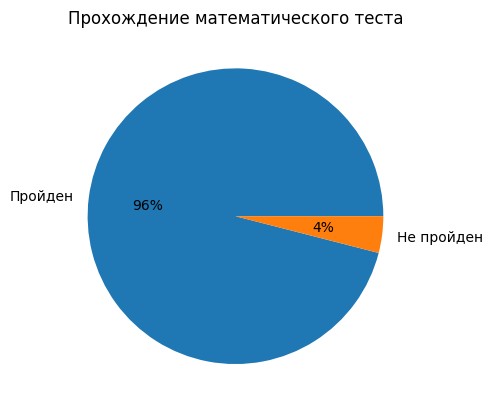

In [33]:
def is_math_passed(value: int) -> int:
    if value >= 40:
        return 1
    else:
        return 0

df['math_passed'] = df['math score'].apply(is_math_passed)

df['math_passed'].value_counts().plot(kind='pie', labels=['Пройден', 'Не пройден'], autopct='%1.0f%%')

plt.title('Прохождение математического теста')
plt.ylabel('')

plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

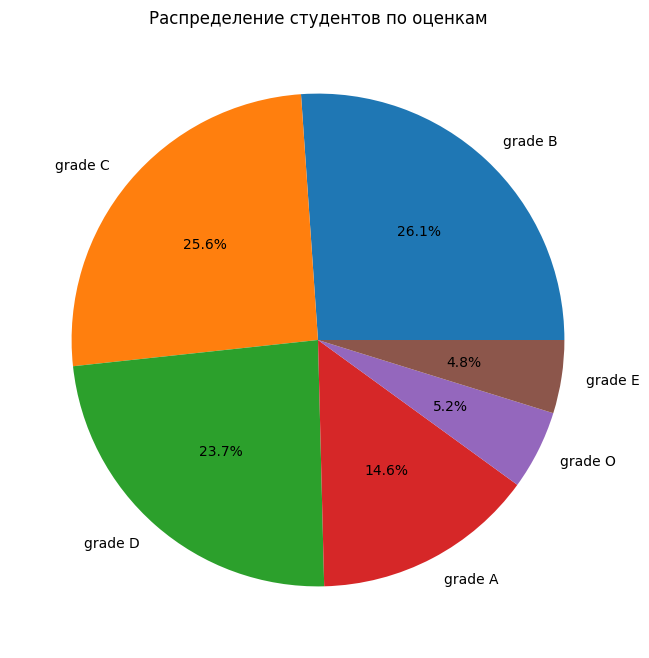

In [38]:
def grading_marks(row) -> str:
    average_mark = (row['math score'] + row['reading score'] + row['writing score']) / 3
    if row['math score'] < 40:
        return 'grade E'
    elif average_mark >= 90:
        return 'grade O'
    elif average_mark >= 80:
        return 'grade A'
    elif average_mark >= 70:
        return 'grade B'
    elif average_mark >= 60:
        return 'grade C'
    elif average_mark >= 41:
        return 'grade D'
    else:
        return 'grade E'

df['grade'] = df.apply(grading_marks, axis=1)

grade_counts = df['grade'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%')
plt.title('Распределение студентов по оценкам')

plt.show()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

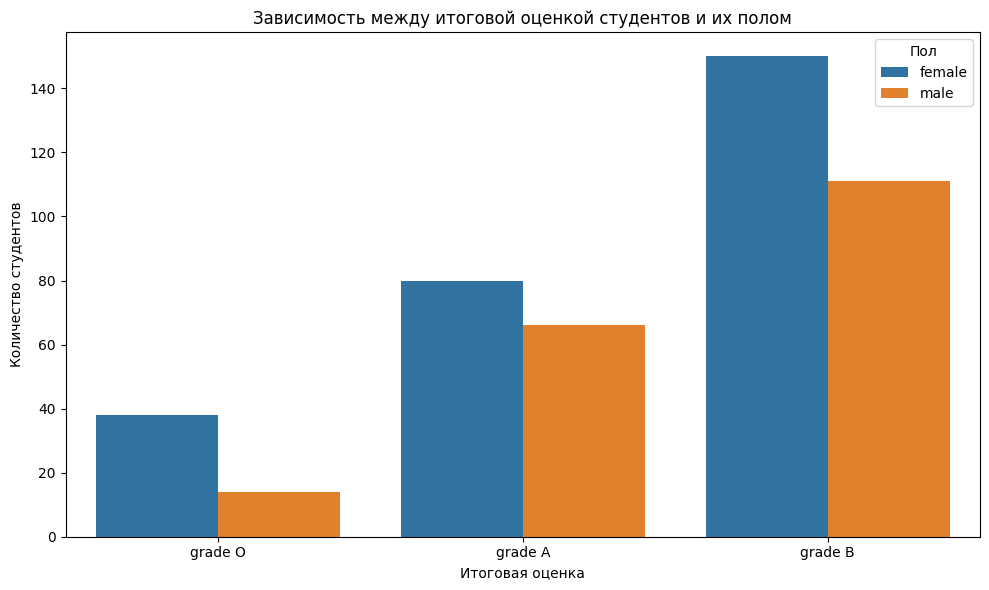

In [39]:
plt.figure(figsize=(10, 6))

sns.countplot(x='grade', hue='gender', data=df, order=['grade O', 'grade A', 'grade B'])
plt.title('Зависимость между итоговой оценкой студентов и их полом')
plt.xlabel('Итоговая оценка')
plt.ylabel('Количество студентов')
plt.legend(title='Пол')

plt.tight_layout()
plt.show()